In [47]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [48]:
mnist_data = tf.keras.datasets.mnist

In [49]:
(x_train, y_train), (x_test, y_test )= mnist_data.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [50]:
#Values are 0-255, so we need to scale them to 0-1
x_train[0][14]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [51]:
def scale_data(x_train, x_test):
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    return x_train, x_test

In [52]:
x_train, x_test = scale_data(x_train, x_test)

In [53]:
#Now data is scaled to 0-1
x_train[0][14]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.31764706, 0.94117647,
       0.99215686, 0.99215686, 0.46666667, 0.09803922, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [54]:
#Add a dummy dimension to the data
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [55]:
x_train.shape

(60000, 28, 28, 1)

In [56]:
def get_model(input_shape):
    model = Sequential([
        Conv2D(8,(3,3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    print(model.summary())
    return model

In [57]:
def compile_model(model):
    model.compile(optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )
    return model

In [58]:
def train_model(model, x_train, y_train):
    history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=256)
    return history

In [59]:
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    return test_loss, test_acc

In [62]:
model = get_model(x_train[0].shape)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 1568)              0         
                                                                 
 dense_18 (Dense)            (None, 64)                100416    
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                      

In [63]:
compile_model(model)

In [67]:
history = train_model(model, x_train, y_train)

Epoch 1/10
188/188 [==============================] - 5s 26ms/step - loss: 0.5637 - accuracy: 0.8322 - val_loss: 0.2228 - val_accuracy: 0.9356
Epoch 2/10
188/188 [==============================] - 4s 23ms/step - loss: 0.1849 - accuracy: 0.9451 - val_loss: 0.1488 - val_accuracy: 0.9573
Epoch 3/10
188/188 [==============================] - 5s 24ms/step - loss: 0.1264 - accuracy: 0.9622 - val_loss: 0.1061 - val_accuracy: 0.9697
Epoch 4/10
188/188 [==============================] - 5s 27ms/step - loss: 0.0956 - accuracy: 0.9709 - val_loss: 0.0896 - val_accuracy: 0.9733
Epoch 5/10
188/188 [==============================] - 4s 24ms/step - loss: 0.0733 - accuracy: 0.9784 - val_loss: 0.0790 - val_accuracy: 0.9777
Epoch 6/10
188/188 [==============================] - 5s 28ms/step - loss: 0.0615 - accuracy: 0.9820 - val_loss: 0.0805 - val_accuracy: 0.9760
Epoch 7/10
188/188 [==============================] - 5s 26ms/step - loss: 0.0526 - accuracy: 0.9846 - val_loss: 0.0751 - val_accuracy: 0.9773

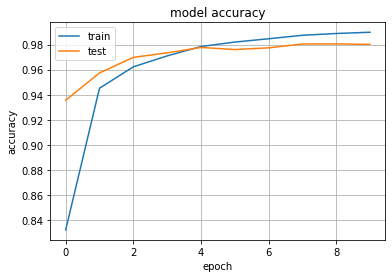

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid(True)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

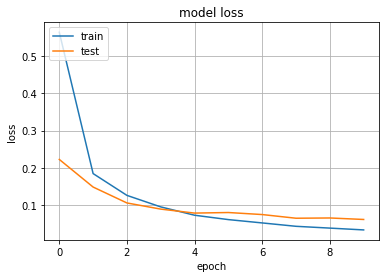

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid(True)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [77]:
test_loss, test_acc = evaluate_model(model, x_test, y_test)
test_loss = test_loss*100
test_acc = test_acc*100
print("Test loss: %.3f" %test_loss,"%")
print("Test accuracy: %.3f" %test_acc,"%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0564 - accuracy: 0.9822
Test loss: 5.640 %
Test accuracy: 98.220 %


In [82]:
y_pred = model.predict(x_test)

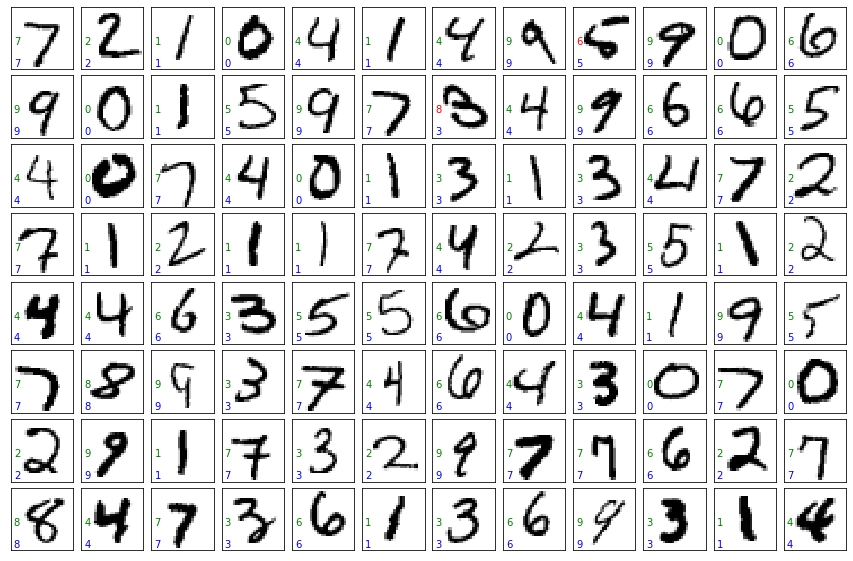

In [90]:
fig, ax = plt.subplots(
    8, 12, figsize=(15, 10),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1),
    )
for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary', interpolation='nearest')
    axi.text(0.05, 0.05, str(int(y_test[i])), transform=axi.transAxes, color='blue')
    axi.text(0.05, 0.4, str(int(np.argmax(y_pred[i]))), transform=axi.transAxes, color='green' if np.argmax(y_pred[i]) == y_test[i] else 'red')
plt.show()
